# Investigating the Titanic Dataset

### Load the Data and Perform an Initial Investigation

In [207]:
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('./titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


The following is a description of the variables in this dataset. This description has been copied from the data source found at Kaggle.com (https://www.kaggle.com/c/titanic/data).

**VARIABLE DESCRIPTIONS:**
- survival       - Survival (0 = No; 1 = Yes)
- pclass         - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name           - Name
- sex            - Sex
- age            - Age
- sibsp          - Number of Siblings/Spouses Aboard
- parch          - Number of Parents/Children Aboard
- ticket         - Ticket Number
- fare           - Passenger Fare
- cabin          - Cabin
- embarked       - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES:**

Pclass is a proxy for socio-economic status (SES) - 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1) - If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

### Questions to Investigate

- What are the extremals in age and fare for passenegers who survived or didn't survive? Who are these passengers?
- Is there a relationship between socio-economic status and the size of families aboard the Titanic?
- Is there a relationship between socio-economic status and where the passengers embarked?
- Were passengers with higher socio-economic status more likely to survive?
- Were men or women more likely to survive?
- Were passengers of certain ages likely to survive?
- Is a passeneger's socio-economic status, gender, or age the better indicator of their survival?

### Tidy the data

In [215]:
def age_to_decade_category(age):
    if str(age) == 'nan': 
        return '?'
    floor = int(math.floor(age/10.0) * 10)
    return str(floor) + 's'

tidy_titanic_df = titanic_df.copy()

# Create a single column that is the sum of siblings and parents
tidy_titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# TODO: Tidy unkown ages

# TODO: Decade of age (leading digit fo two digit age)
tidy_titanic_df['AgeByDecade'] = titanic_df['Age']
tidy_titanic_df['AgeByDecade'] = tidy_titanic_df['AgeByDecade'].apply(age_to_decade_category)
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'AgeByDecade',
          'SibSp', 'Parch', 'FamilySize', 'Ticket', 'Fare', 'Embarked']
# Correct the order of the columns
tidy_titanic_df = tidy_titanic_df[columns]
tidy_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,20s,1,0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,30s,1,0,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,20s,0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,30s,1,0,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,30s,0,0,0,373450,8.0500,S


### What are the extrema in age and fare for passenegers who survived or didn't survive? Who are these passengers?

In [6]:
from IPython.display import display

def passenger_by_survival_and_variable_extrema(survived, variable, extremal):
    if survived:
        survival_filter = titanic_df['Survived'] == 1
    else:
        survival_filter = titanic_df['Survived'] == 0
    
    extremal_value = getattr(titanic_df[survival_filter][variable], extremal)()
    query_string   = str(variable) + ' == ' + str(extremal_value)
    passenger      = titanic_df[survival_filter].query(query_string)
    
    return passenger

def age_and_fare_exterma_analysis_by_survival(survived):
    survival_wording = 'survived' if survived else 'did not survive'
    print "The oldest passeneger(s) who %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Age', 'max'))
    print"\n"
    print "The youngest passeneger(s) who %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Age', 'min'))
    print"\n"
    print "The passeneger(s) who paid the most and %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Fare', 'max'))
    print"\n"
    print "The passeneger(s) who paid the least and %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Fare', 'min'))

#### Extrema for passenegers who survived.

In [7]:
age_and_fare_exterma_analysis_by_survival(True)

The oldest passeneger(s) who survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S




The youngest passeneger(s) who survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C




The passeneger(s) who paid the most and survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C




The passeneger(s) who paid the least and survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,NaN,S


#### Extrema for passenegers who did not survive.

In [8]:
age_and_fare_exterma_analysis_by_survival(False)

The oldest passeneger(s) who did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,NaN,S




The youngest passeneger(s) who did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9000,NaN,S




The passeneger(s) who paid the most and did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263,C23 C25 C27,S




The passeneger(s) who paid the least and did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0,B94,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0,NaN,S


TODO: Write an analysis of the above.

### Set up code to support the analysis of two sets of categorical variables

In [253]:
import math
import seaborn as sns
from scipy.stats import chisquare, chi2_contingency, norm
%matplotlib inline

def descriptive_statistics_of_numeric_series(var, label):
    series = tidy_titanic_df[var]
    print "Summary Statistics for " + label
    print "Median: " + str(series.median())
    print "Mean: " + str(series.mean())
    print "Standard Deviation: " + str(series.std())
    print "\n"

def distinct_counts_of_categorical_series(var, label):
    series = tidy_titanic_df[var].sort_values()
    print "Category counts for " + label
    print series.value_counts().sort_index()
    print "\n"
    
def visual_analysis_of_two_categorical_variables(var_a, var_b):
    series_a = tidy_titanic_df[var_a].sort_values()
    series_b = tidy_titanic_df[var_b].sort_values()
    colour_palette = "GnBu_d"
    sns.plt.figure(figsize=(16, 6))
    sns.plt.subplot(1,3,1)
    sns.countplot(series_a, palette=colour_palette)
    sns.plt.subplot(1,3,2)
    sns.violinplot(x=series_a, y=series_b, palette=colour_palette, inner="stick");
    sns.plt.subplot(1,3,3)
    sns.countplot(series_b, palette=colour_palette)
    sns.plt.show()
    
def chi_squared_and_carmers_v_anlysis(var_a, var_b):
    table_of_frequencies = tidy_titanic_df.pivot_table(index=var_a, columns=var_b, values='PassengerId', 
                                                       fill_value=0, aggfunc=lambda x: len(x.unique()))
    alpha = 0.001
    conf = (1 - alpha)*100
    print "χ²: " + var_a + " and " + var_b
    print "H0: The null hypothesis for this χ² test is that " + var_a + " and " + var_b + " are independent of each other."
    print "HA: The alternative hypothesis for this χ² test is that " + var_a + " and " + var_b + " are in some way dependent."
    print "For this test, we are considering an alpha level " + str(alpha) + " allowing for " + str(conf) + "% level of confidence."
    chi2, p, dof, ex = chi2_contingency(table_of_frequencies)
    dof_label = ("degree" if dof == 1 else "degrees") + " of freedom"
    outcome = "With a p-value of " + str(p) + " and a χ² statistic of " + str(chi2) + " with " + str(dof) + " " + dof_label  + " we\n"
    reject_null = p < alpha
    if reject_null:
        outcome += "reject the null hypothesis and accept that " + var_a + " and " + var_b + " are in some way dependent."
    else:
        outcome += "fail to reject the null hypothesis that " + var_a + " and " + var_b + " are independent."
    hr = "-----------------------------------------------------------------------------------------------------"
    print hr
    print outcome
    print hr
    
    V = math.sqrt(chi2 / len(tidy_titanic_df) / (min(table_of_frequencies.shape) - 1))
    cramers_v_output = ("The Cramer's V measure of association for " + var_a + " and " + var_b + " has a vlue of " + str(V) + "\n" +
        "equating to a ")
    if V < 0.1:
        cramers_v_output += "ineffectual"
    elif V < 0.2: 
        cramers_v_output += "small"
    elif V < 0.3: 
        cramers_v_output += "small to medium"
    elif V < 0.4: 
        cramers_v_output += "medium"
    elif V < 0.5:
        cramers_v_output += "medium to large"
    else:
        cramers_v_output += "large"
    
    cramers_v_output += " effect size [1][2]."
    
    print cramers_v_output
    print hr
    

### Is there a relationship between socio-economic status and the size of families aboard the Titanic?

Summary Statistics for Socio-Economic Status (Pclass)
Median: 3.0
Mean: 2.30864197531
Standard Deviation: 0.836071240977


Category counts for Socio-Economic Status (Pclass)
1    216
2    184
3    491
Name: Pclass, dtype: int64


Summary Statistics for Family Onboard (FamilySize)
Median: 0.0
Mean: 0.904601571268
Standard Deviation: 1.61345854136


Category counts for Family Onboard (FamilySize)
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: FamilySize, dtype: int64




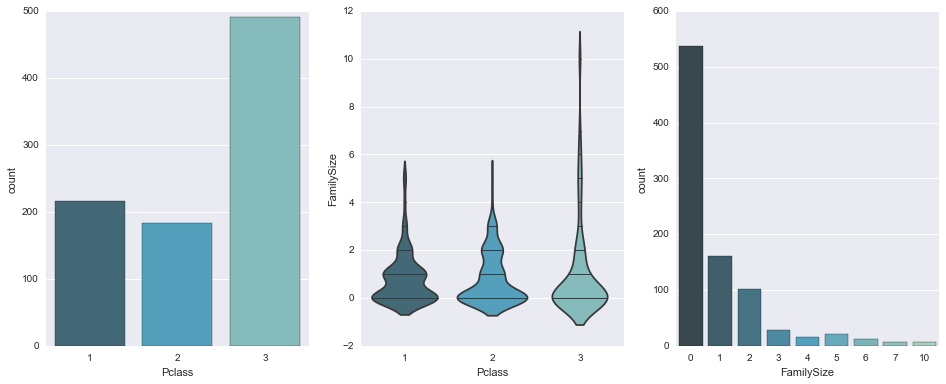

χ²: Pclass and FamilySize
H0: The null hypothesis for this χ² test is that Pclass and FamilySize are independent of each other.
HA: The alternative hypothesis for this χ² test is that Pclass and FamilySize are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 3.48927313495e-12 and a χ² statistic of 89.2150566031 with 16 degrees of freedom we
reject the null hypothesis and accept that Pclass and FamilySize are in some way dependent.
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Pclass and FamilySize has a vlue of 0.223751125126
equating to a small to medium effect size [1][2].
-----------------------------------------------------------------------------------------------------


In [254]:
descriptive_statistics_of_numeric_series('Pclass', "Socio-Economic Status (Pclass)")
distinct_counts_of_categorical_series('Pclass', "Socio-Economic Status (Pclass)")
descriptive_statistics_of_numeric_series('FamilySize', "Family Onboard (FamilySize)")
distinct_counts_of_categorical_series('FamilySize', "Family Onboard (FamilySize)")
visual_analysis_of_two_categorical_variables('Pclass', 'FamilySize')
chi_squared_and_carmers_v_anlysis('Pclass', 'FamilySize')

TODO: Write an analysis of the above.

### Is there a relationship between socio-economic status and where the passengers embarked?

Category counts for Port of Embarkation
C    168
Q     77
S    644
Name: Embarked, dtype: int64




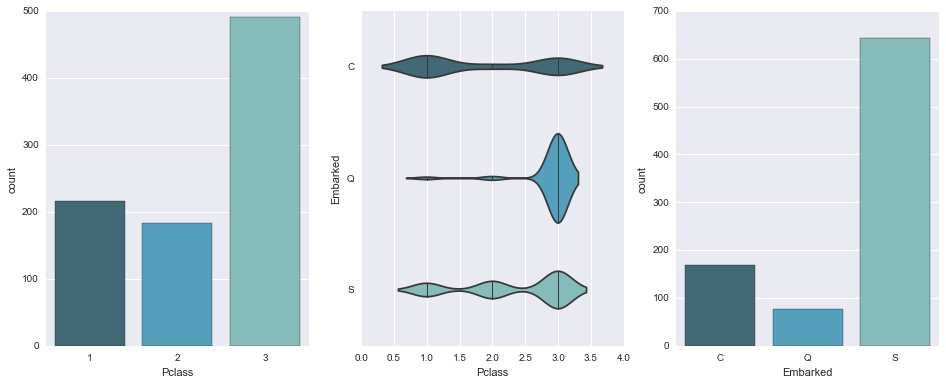

χ²: Pclass and Embarked
H0: The null hypothesis for this χ² test is that Pclass and Embarked are independent of each other.
HA: The alternative hypothesis for this χ² test is that Pclass and Embarked are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 8.43526781989e-26 and a χ² statistic of 123.75190953 with 4 degrees of freedom we
reject the null hypothesis and accept that Pclass and Embarked are in some way dependent.
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Pclass and Embarked has a vlue of 0.263525171492
equating to a small to medium effect size [1][2].
-----------------------------------------------------------------------------------------------------


In [255]:
distinct_counts_of_categorical_series('Embarked', "Port of Embarkation")
visual_analysis_of_two_categorical_variables('Pclass', 'Embarked')
chi_squared_and_carmers_v_anlysis('Pclass', 'Embarked')

TODO: Write an analysis of the above.

### Were passengers with higher socio-economic status more likely to survive?

Summary Statistics for Survived
Median: 0.0
Mean: 0.383838383838
Standard Deviation: 0.486592454265


Category counts for Survived
0    549
1    342
Name: Survived, dtype: int64




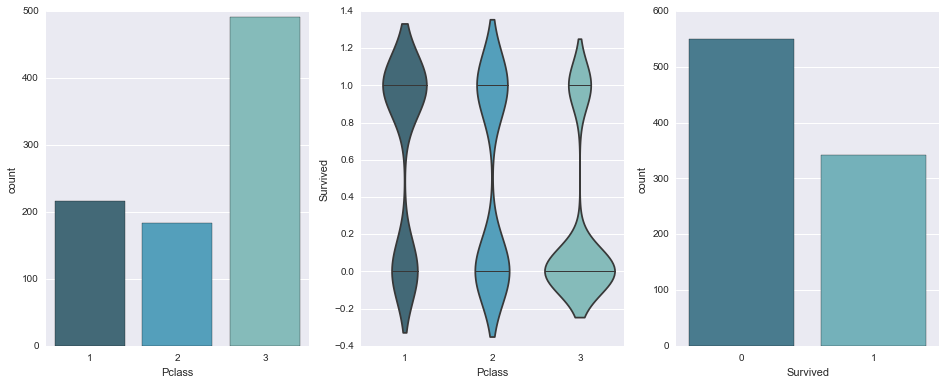

χ²: Pclass and Survived
H0: The null hypothesis for this χ² test is that Pclass and Survived are independent of each other.
HA: The alternative hypothesis for this χ² test is that Pclass and Survived are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 4.5492517113e-23 and a χ² statistic of 102.888988757 with 2 degrees of freedom we
reject the null hypothesis and accept that Pclass and Survived are in some way dependent.
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Pclass and Survived has a vlue of 0.339817388005
equating to a medium effect size [1][2].
-----------------------------------------------------------------------------------------------------


In [ ]:
descriptive_statistics_of_numeric_series('Survived', "Survived")
distinct_counts_of_categorical_series('Survived', "Survived")
visual_analysis_of_two_categorical_variables('Pclass', 'Survived')
chi_squared_and_carmers_v_anlysis('Pclass', 'Survived')

TODO: Write an analysis of the above.

### Were men or women more likely to survive?

In [ ]:
distinct_counts_of_categorical_series('Sex', 'Sex')
visual_analysis_of_two_categorical_variables('Survived', 'Sex')
chi_squared_and_carmers_v_anlysis('Survived', 'Sex')

TODO: Write an analysis of the above.

### Were passengers of certain ages likely to survive?

In [ ]:
descriptive_statistics_of_numeric_series('Age', 'Age')
distinct_counts_of_categorical_series('AgeByDecade', 'Age By Decade')
visual_analysis_of_two_categorical_variables('Survived', 'AgeByDecade')
chi_squared_and_carmers_v_anlysis('Survived', 'AgeByDecade')

TODO: Write an analysis of the above.

TODO: Do a seperate analysis of the passengers with unknown ages.

### Is a passeneger's socio-economic status, gender, or age the better indicator of their survival?

### Conclussions and Further Analysis

### References

[1] Wikipedia contributors, "Cramér's V," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Cram%C3%A9r%27s_V&oldid=705563259 (accessed March 14, 2016).

[2] Wikipedia contributors, "Effect size," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Effect_size&oldid=706273103 (accessed March 14, 2016).